In [2]:
from fastai.tabular import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import os
import sys
import glob
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [30]:
from sklearn.model_selection import StratifiedKFold
skfolds=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [3]:
df = pd.read_csv('/root/FinalDataset/All.csv', low_memory=False)

In [4]:
df.shape

(36707, 80)

In [5]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [6]:
df.dtypes

Querylength                int64
domain_token_count         int64
path_token_count           int64
avgdomaintokenlen        float64
longdomaintokenlen         int64
                          ...   
Entropy_DirectoryName    float64
Entropy_Filename         float64
Entropy_Extension        float64
Entropy_Afterpath        float64
URL_Type_obf_Type         object
Length: 80, dtype: object

In [7]:
#to show all,we set it 'None'
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
df.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [9]:
df.head(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement
5,0,4,8,5.5,14,6.500000,4,22,10,0,0,0,0,0,0,0,0,0,0,91,25,59,59,2,2,2,0.648352,0.021978,0.08,0.274725,2.36,0.033898,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,78,22,8,13,31,-1,34,14,15,13,-1,0,0,4,0,4,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.666676,0.784493,0.814725,0.755658,0.0,-1.0,Defacement
6,0,4,5,5.5,14,7.800000,4,17,10,0,0,0,0,0,0,0,0,0,0,75,25,43,43,2,2,2,0.573333,0.026667,0.08,0.333333,1.72,0.046512,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,18,14,18,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.682440,0.784493,0.814725,0.766719,0.0,-1.0,Defacement
7,0,4,7,5.5,14,6.285714,4,16,9,0,0,0,0,0,0,0,0,0,0,82,25,50,50,2,2,2,0.609756,0.024390,0.08,0.304878,2.00,0.040000,0,-1,4,-1,0.6,-1,8,0,0,0,8,-1,62,22,8,13,15,-1,25,14,13,13,-1,0,0,4,0,3,-1,0.097561,0.0,0.0,0.320000,NaN,-1.0,8,3,3,0,0,-1,0.709396,0.784493,0.814725,0.797498,0.0,-1.0,Defacement
8,0,4,6,5.5,14,6.500000,4,16,10,0,0,0,0,0,0,0,0,0,0,76,25,44,44,2,2,2,0.578947,0.026316,0.08,0.328947,1.76,0.045455,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,19,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.678242,0.784493,0.814725,0.732258,0.0,-1.0,Defacement
9,0,4,5,5.5,14,3.600000,4

In [11]:
# basic statistical details
print(df.describe())

        Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
count  36707.000000        36707.000000      36707.000000       36707.000000   
mean      21.908110            2.857439          8.954668           5.401719   
std       94.280669            0.906562          4.278406           1.986858   
min        0.000000            2.000000          0.000000           1.500000   
25%        0.000000            2.000000          6.000000           4.000000   
50%        0.000000            3.000000          8.000000           5.000000   
75%       19.000000            3.000000         11.000000           6.500000   
max     1385.000000           19.000000         68.000000          29.500000   

       longdomaintokenlen  avgpathtokenlen           tld  charcompvowels  \
count        36707.000000     36427.000000  36707.000000    36707.000000   
mean             9.746016         4.556261      2.857439       14.976517   
std              4.856580         2.839388      0.9

In [12]:
df['argPathRatio'] = df['argPathRatio'].astype('float')

In [13]:
# check attibute types
df.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [20]:
print(df.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
Defacement    7930
benign        7781
malware       6712
phishing      7586
spam          6698
dtype: int64


In [21]:
label = 'URL_Type_obf_Type'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df[df[label] == lbl].index)))

| phishing | 7586 |
| benign | 7781 |
| spam | 6698 |
| Defacement | 7930 |
| malware | 6712 |


In [22]:
# function for cleanse data:loads, cleans and returns panda dataframe
# https://github.com/rambasnet/DeepLearningMaliciousURLs
def loadAndCleanData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        #df.drop(columns=[], inplace=True)
        # drop missing values/NaN etc.
        #df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        for col in df.columns:
            indexNames = df[df[col] == 'Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]== 'NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        df['argPathRatio'].astype('float')
        # drop NaN pandas way
        beforeRows = df.shape[0]
        df.dropna(inplace = True)
        print('Dropped {} rows with NaN values'.format(beforeRows - df.shape[0]))
        df.to_pickle(pickleDump)
        
    return df

In [23]:
df1 = loadAndCleanData('/root/FinalDataset/All.csv')

Dropped 17725 rows with NaN values


In [24]:
label = 'URL_Type_obf_Type'
lblTypes = set(df1[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df1[df1[label] == lbl].index)))

| phishing | 4014 |
| benign | 2709 |
| spam | 5342 |
| Defacement | 2477 |
| malware | 4440 |


<AxesSubplot:>

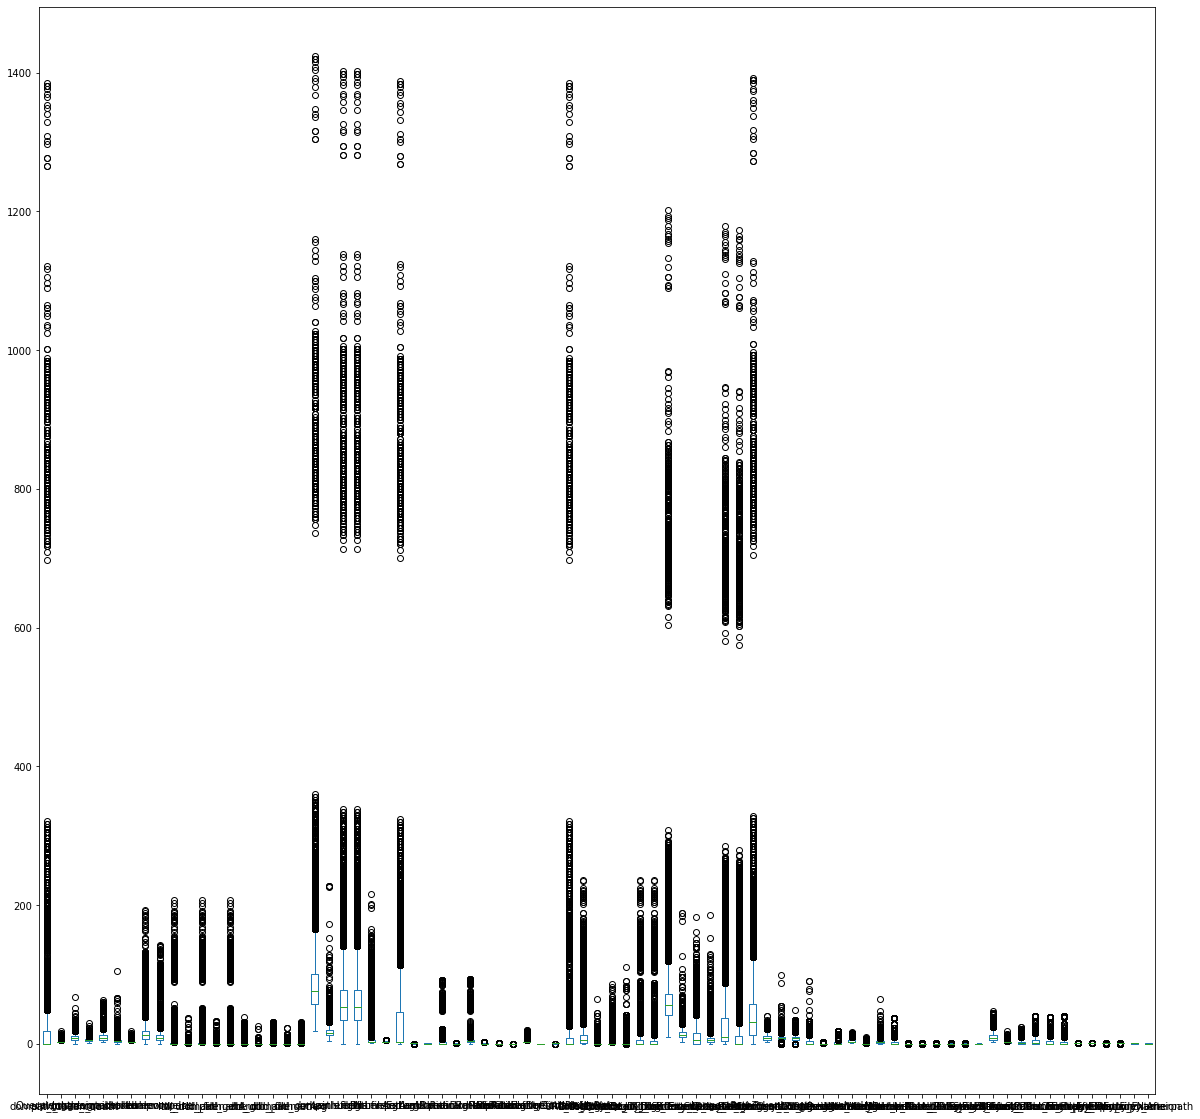

In [25]:
df.plot.box(figsize=(20,20))

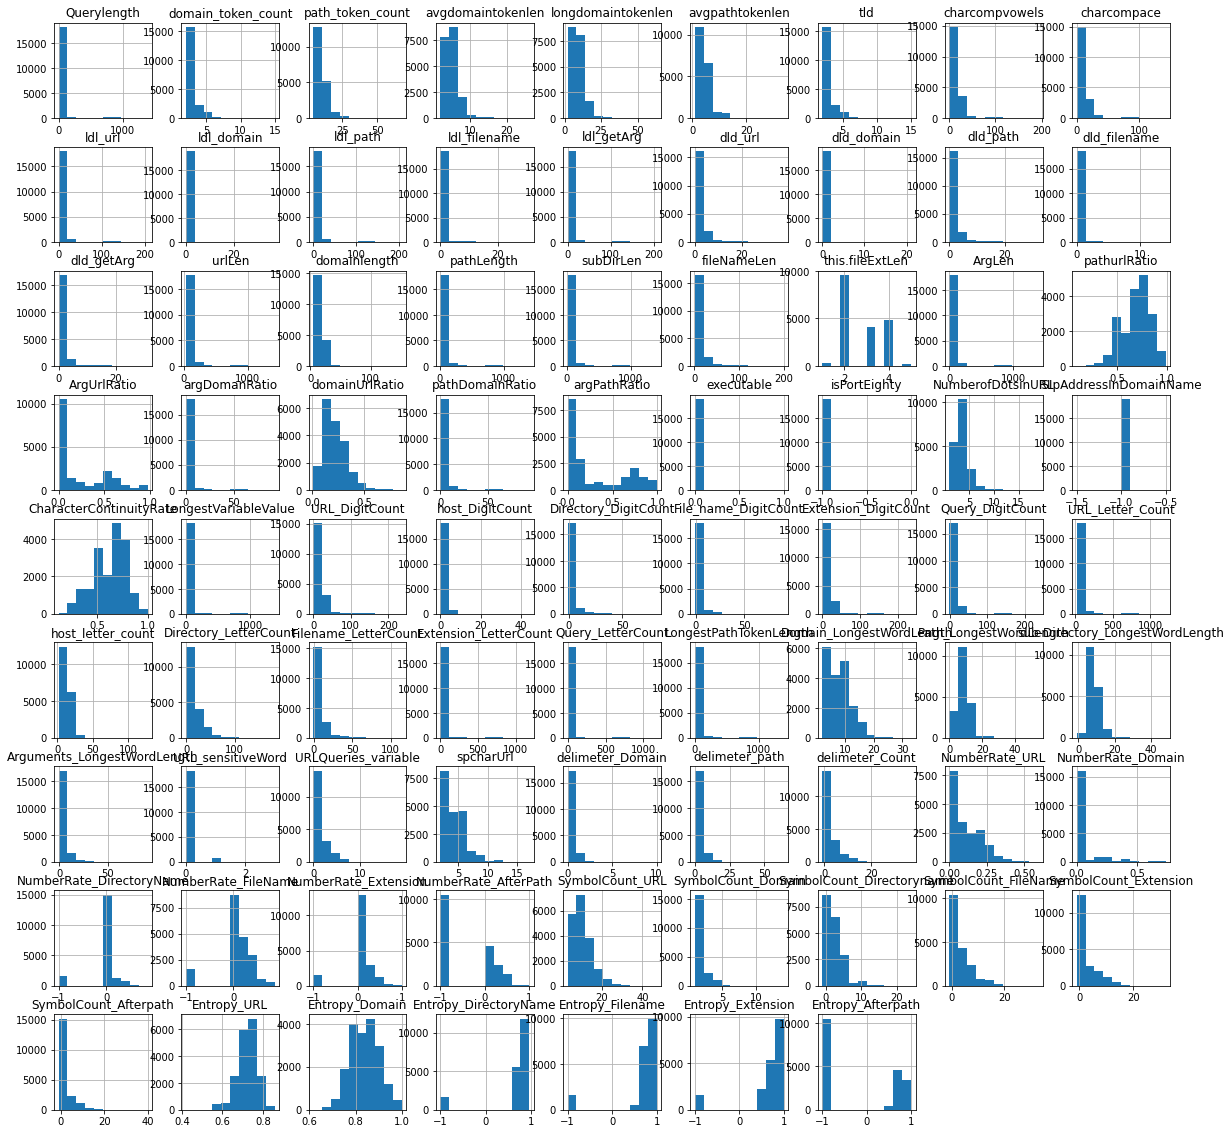

In [26]:
# plot histograms of each feature
df1.hist(figsize=(20, 20))
plt.show()

In [38]:
def splitDataset(df):
    array = df.values
    X = array[:,0:79]
    Y = array[:,79]
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=None, shuffle=True)
    return X_train, X_validation, Y_train, Y_validation
    

In [41]:
def runExperiments(X_train, Y_train):
    random_seed = 100
    scoring = 'accuracy'
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('AB', AdaBoostClassifier(n_estimators=100)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=10)))
    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
        print(msg)
    return results, accuracies, classifiers

In [42]:
X_train, X_validation, Y_train, Y_validation = splitDataset(df1)
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR: 0.869804 (0.011277)
LDA: 0.820478 (0.012704)
KNN: 0.911293 (0.007717)
CART: 0.939083 (0.005972)
NB: 0.626143 (0.013915)
SVM: 0.910240 (0.008650)
AB: 0.624369 (0.032125)
DT: 0.940137 (0.005108)
RF: 0.961014 (0.005187)


## Compare and Select Best Model
- Compare Algorithms using box-plot

In [43]:
def compareModels(accuracies, results, classifiers):
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

RF 0.96
DT 0.94
CART 0.94
KNN 0.91
SVM 0.91
LR 0.87
LDA 0.82
NB 0.63
AB 0.62


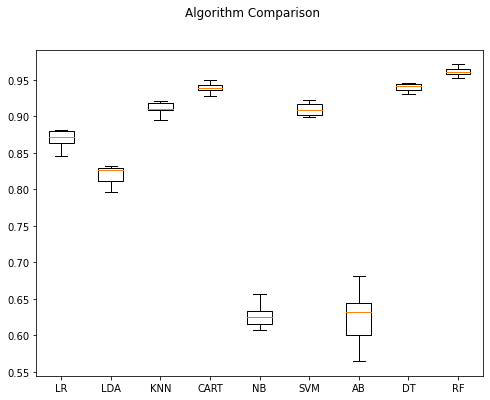

In [44]:
compareModels(accuracies, results, classifiers)

# Make Predictions using Random Forest (RF)
- RF provides superior accuracy result over all the classifiers
- now check the accuracy of the best model using validation set

In [45]:
def testBestModel(model, X_validation, Y_validation):
    Y_predictions = rf.predict(X_validation)
    print("Accuracy = {:.2f}".format(accuracy_score(Y_validation, Y_predictions)))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_validation, Y_predictions))
    print('Classification Report:')
    print(classification_report(Y_validation, Y_predictions))
    return Y_predictions

In [46]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
Y_predictions = testBestModel(rf, X_validation, Y_validation)

Accuracy = 0.97
Confusion Matrix:
[[ 481    3    2   18    0]
 [   1  503    4   15    0]
 [   2    8  905   10    1]
 [   8   11   11  729    9]
 [   1    3    2   21 1049]]
Classification Report:
              precision    recall  f1-score   support

  Defacement       0.98      0.95      0.96       504
      benign       0.95      0.96      0.96       523
     malware       0.98      0.98      0.98       926
    phishing       0.92      0.95      0.93       768
        spam       0.99      0.97      0.98      1076

    accuracy                           0.97      3797
   macro avg       0.96      0.96      0.96      3797
weighted avg       0.97      0.97      0.97      3797



### Confusion Matrix Visualization

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

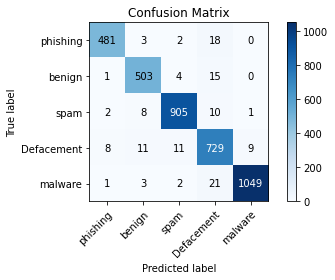

In [48]:
classes = lblTypes
np.set_printoptions(precision=2)
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')

In [49]:
lblTypes = list(lblTypes)
lblTypes

['phishing', 'benign', 'spam', 'Defacement', 'malware']

In [50]:
#transfrom multi-classification to binary-classification
lblTypes = dict(zip(lblTypes, ['malicious']*5))
lblTypes['benign'] = 'benign'
lblTypes

{'phishing': 'malicious',
 'benign': 'benign',
 'spam': 'malicious',
 'Defacement': 'malicious',
 'malware': 'malicious'}

In [51]:
df1[label] = df1[label].map(lblTypes)

In [52]:
print(df1.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
benign        2709
malicious    16273
dtype: int64


In [53]:
df1.tail()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,0,3,0,2,0,0,0,0,0,146,26,113,113,2,2,85,0.773973,0.582192,3.269231,0.178082,4.346154,0.752212,0,-1,5,-1,0.500000,23,31,0,4,0,27,3,94,23,46,7,14,24,43,12,11,11,23,0,3,6,0,2,5,0.212329,0.0,0.064516,0.529412,0.627907,0.066667,19,3,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,malicious
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,0,0,0,0,0,0,0,0,0,147,18,122,122,2,2,2,0.829932,0.013605,0.111111,0.122449,6.777778,0.016393,0,-1,5,-1,0.500000,-1,21,0,0,0,21,-1,101,15,7,6,69,-1,105,8,9,9,-1,0,0,3,0,2,-1,0.142857,0.0,0.000000,0.187500,0.200000,-1.000000,23,3,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,malicious
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,0,20,0,18,12,0,12,0,12,246,22,217,217,2,2,182,0.882114,0.739837,8.272727,0.089431,9.863636,0.838710,0,-1,7,-1,0.772727,58,57,0,6,0,51,1,156,20,71,3,58,48,118,16,12,12,0,0,1,12,0,9,1,0.231707,0.0,0.073171,0.377778,0.418033,0.029412,26,2,14,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,malicious
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,0,7,0,7,4,0,4,0,4,116,15,94,94,2,2,71,0.810345,0.612069,4.733333,0.129310,6.266667,0.755319,0,-1,3,-1,0.666667,32,25,0,0,0,25,23,73,13,4,11,41,12,75,9,8,8,0,0,2,3,0,3,3,0.215517,0.0,0.000000,0.284091,0.333333,0.418182,14,2,1,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,malicious
36706,40,3,25,6.666666,16,3.250000,3,35,31,19,0,19,0,17,6,0,6,0,6,227,22,198,198,2,2,164,0.872247,0.722467,7.454546,0.096916,9.000000,0.828283,0,-1,6,-1,0.772727,40,52,0,6,1,45,2,144,20,50,6,64,31,118,16,10,10,0,0,1,11,0,8,1,0.229075,0.0,0.083333,0.365079,0.381356,0.060000,24,2,13,7,6,7,0.674351,0.801139,0.697282,0.730563,0.731481,0.769238,malicious


In [54]:
X_train, X_validation, Y_train, Y_validation = splitDataset(df1)
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR: 0.956470 (0.002973)
LDA: 0.927297 (0.006151)
KNN: 0.971550 (0.002226)
CART: 0.983734 (0.002568)
NB: 0.598948 (0.017800)
SVM: 0.956404 (0.005486)
AB: 0.980047 (0.002697)
DT: 0.983602 (0.002195)
RF: 0.987422 (0.002935)


RF 0.99
CART 0.98
DT 0.98
AB 0.98
KNN 0.97
LR 0.96
SVM 0.96
LDA 0.93
NB 0.60


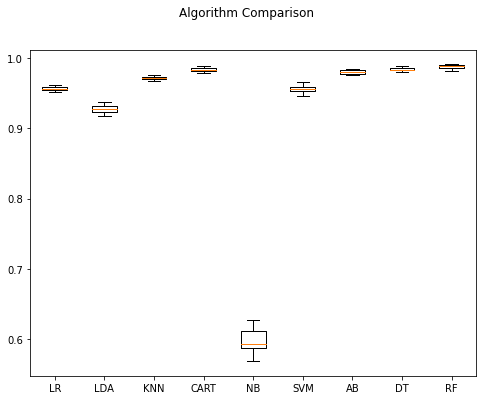

In [55]:
compareModels(accuracies, results, classifiers)

In [56]:
# RF Model get best performance,so here we test it
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
Y_predictions = testBestModel(rf, X_validation, Y_validation)

Accuracy = 0.99
Confusion Matrix:
[[ 549   32]
 [  18 3198]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.94      0.96       581
   malicious       0.99      0.99      0.99      3216

    accuracy                           0.99      3797
   macro avg       0.98      0.97      0.97      3797
weighted avg       0.99      0.99      0.99      3797



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

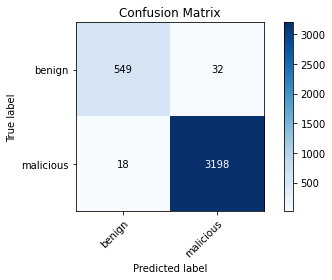

In [57]:
classes = ['benign', 'malicious']
np.set_printoptions(precision=2)
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')